<a href="https://colab.research.google.com/github/Aless1997/DataSet_1/blob/main/ANALISI_DATASET_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importiamo le librerie di cui abbiamo bisogno per questa analisi:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

Scegliamo un Data Set dalla libreria Seaborn

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Scegliamo il Data Set 'Titanic'

In [3]:
df = sns.load_dataset('titanic')

Analizziamo la composizione:

In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
for x in df.columns:
  print(x)

survived
pclass
sex
age
sibsp
parch
fare
embarked
class
who
adult_male
deck
embark_town
alive
alone


In [6]:
df.rename(columns={'sex':'gender'}, inplace=True)

for x in df.columns:
  print(x)

survived
pclass
gender
age
sibsp
parch
fare
embarked
class
who
adult_male
deck
embark_town
alive
alone


**Iniziamo a compattare i dati per rendere il data seti più leggibile.**
Soppravisuuti per genere:

In [7]:
df.groupby(['gender'])['survived'].sum()

gender
female    233
male      109
Name: survived, dtype: int64

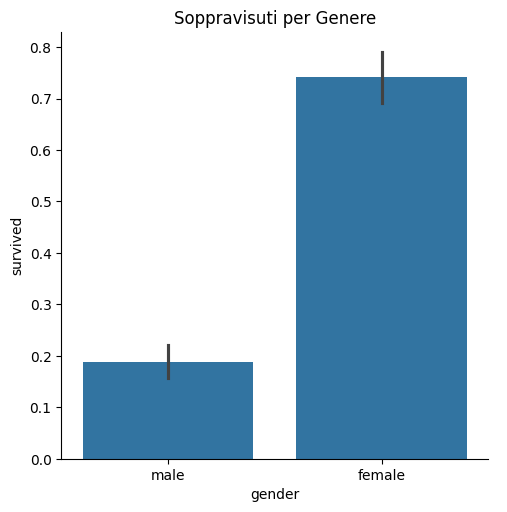

In [8]:
graf_1 = sns.catplot(df,x='gender',y='survived', kind = 'bar')
graf_1.set(title = 'Soppravisuti per Genere')

Rappresentazione dell'età dei soppravisuti

[Text(0.5, 0, 'Soppravisuti')]

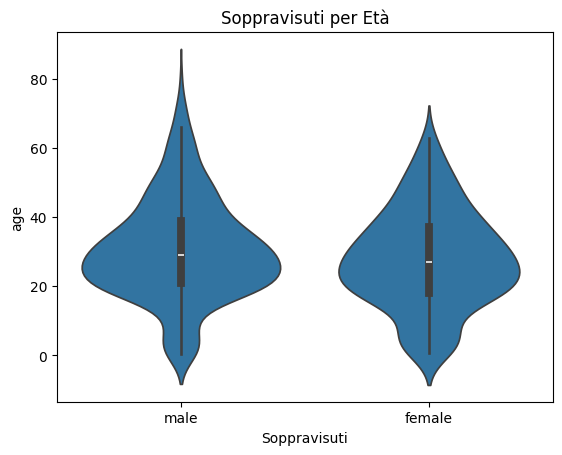

In [9]:
graf_1 = sns.violinplot(df, x='gender',y='age')
graf_1.set(title = 'Soppravisuti per Età')
graf_1.set(xlabel='Soppravisuti')

In [10]:
df.groupby(['gender','pclass'])['survived'].sum()

gender  pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: survived, dtype: int64

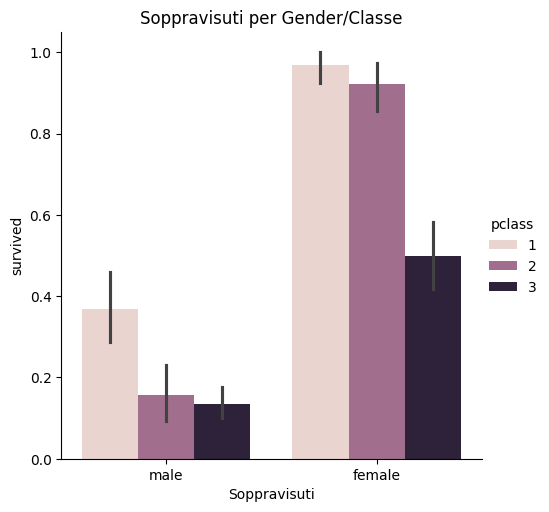

In [11]:
graf_1 = sns.catplot(df,x='gender',y='survived', hue='pclass',kind = 'bar')
graf_1.set(title = 'Soppravisuti per Gender/Classe')
graf_1.set(xlabel='Genere')
graf_1.set(xlabel='Soppravisuti')

[Text(0.5, 23.52222222222222, 'Soppravisuti')]

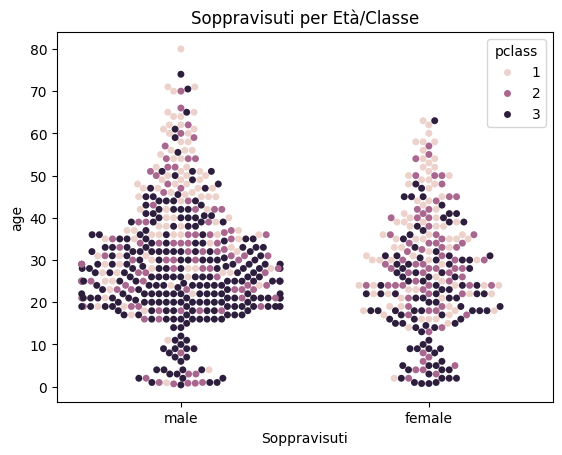

In [12]:
graf_1 = sns.swarmplot(df, x='gender',y='age', hue='pclass')
graf_1.set(title = 'Soppravisuti per Età/Classe')
graf_1.set(xlabel='Soppravisuti')

In [13]:
df.head(10)

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Rielaboramo il Data frame originale per focalizzarci su una Pivot in particolare.

In [20]:
df2 = df.groupby(['gender','who','alive'])['gender'].count()
df2.to_csv('pp.csv')
df2=pd.read_excel('poo.xlsx')
df_2=pd.DataFrame(df2)
print(df_2)

   gender    who alive  Conta
0  female  child    no     15
1  female  child   yes     28
2  female  woman    no     66
3  female  woman   yes    205
4    male  child    no     19
5    male  child   yes     21
6    male    man    no    449
7    male    man   yes     88


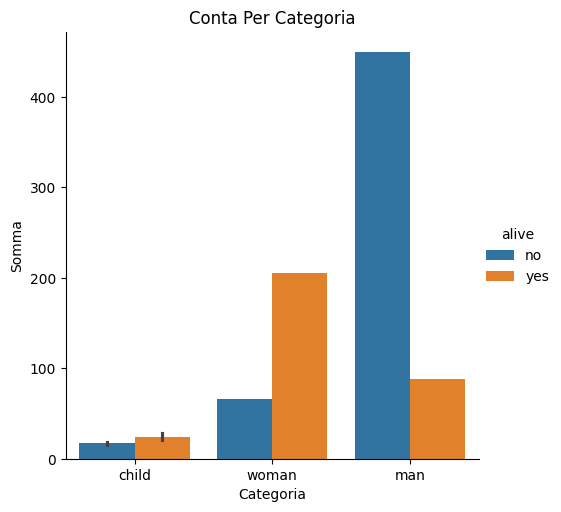

In [21]:
graf_2 = sns.catplot(df_2, x='who', y= 'Conta', hue = 'alive', kind='bar')
graf_2.set(xlabel='Categoria')
graf_2.set(ylabel='Somma')
graf_2.set(title='Conta Per Categoria')

Focalizziamoci su una nuova Pivot

In [22]:
df.groupby(['gender','embark_town','alive'])['alive'].count()

gender  embark_town  alive
female  Cherbourg    no         9
                     yes       64
        Queenstown   no         9
                     yes       27
        Southampton  no        63
                     yes      140
male    Cherbourg    no        66
                     yes       29
        Queenstown   no        38
                     yes        3
        Southampton  no       364
                     yes       77
Name: alive, dtype: int64

Di seguito il link per accedere al file python: https://github.com/Aless1997/DataSet_1

***Contatti:***    
E-mail: alessandro.sinigaglia1997@gmail.com n\
Telefono: 340 958 2184
